In [10]:
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from commons import colors
def read_results(filepath):
    count_results = defaultdict(list)
    count_ciws = defaultdict(list)
    avg_results = defaultdict(list)
    avg_ciws = defaultdict(list)
    costs = defaultdict(list)

    with open(filepath, "r") as f:
        for line in f:
            data = json.loads(line)
            rate = data["rate"]
            count_result = data["count"]
            count_ciw = abs(data["count_ub"] - data["count_lb"])
            avg_result = data["avg"]
            avg_ciw = abs(data["avg_ub"] - data["avg_lb"])
            cost = data["cost"]
            count_results[rate].append(count_result)
            count_ciws[rate].append(count_ciw)
            avg_results[rate].append(avg_result)
            avg_ciws[rate].append(avg_ciw)
            costs[rate].append(cost)

    averaged_count_results = {rate: np.mean(count_results[rate]) for rate in count_results}
    averaged_count_ciws = {rate: np.mean(count_ciws[rate]) for rate in count_ciws}
    averaged_avg_results = {rate: np.mean(avg_results[rate]) for rate in avg_results}
    averaged_avg_ciws = {rate: np.mean(avg_ciws[rate]) for rate in avg_ciws}
    averaged_costs = {rate: np.mean(costs[rate]) for rate in costs}
    return averaged_count_results, averaged_count_ciws, averaged_avg_results, averaged_avg_ciws, averaged_costs

def plot_error(video_partition="41_42"):
    fixed_sampling_file = f"../results/fixed_{video_partition}.jsonl"
    stratified_sampling_file = f"../results/stratified_{video_partition}.jsonl"
    uniform_sampling_file = f"../results/uniform_{video_partition}.jsonl"
    exhaustive_file = f"../results/exhaustive_{video_partition}.jsonl"
    fixed_count_results, _, fixed_avg_results, _, fixed_costs = read_results(fixed_sampling_file)
    stratified_count_results, stratified_count_ciws, stratified_avg_results, stratified_avg_ciws, stratified_costs = read_results(stratified_sampling_file)
    uniform_count_results, uniform_count_ciws, uniform_avg_results, uniform_avg_ciws, uniform_costs = read_results(uniform_sampling_file)
    exhaustive_count_results, _, exhaustive_avg_results, _, exhaustive_costs = read_results(exhaustive_file)

    count_gt = exhaustive_count_results[1]
    avg_gt = exhaustive_avg_results[1]

    fixed_count_error = [100*abs(count_gt - fixed_count_results[rate])/count_gt for rate in sorted(list(fixed_count_results.keys()))]
    stratified_count_error = [100*abs(count_gt - stratified_count_results[rate])/count_gt for rate in sorted(list(stratified_count_results.keys()))]
    uniform_count_error = [100*abs(count_gt - uniform_count_results[rate])/count_gt for rate in sorted(list(uniform_count_results.keys()))]
    fixed_avg_error = [100*abs(avg_gt - fixed_avg_results[rate])/avg_gt for rate in sorted(list(fixed_avg_results.keys()))]
    stratified_avg_error = [100*abs(avg_gt - stratified_avg_results[rate])/avg_gt for rate in sorted(list(stratified_avg_results.keys()))]
    uniform_avg_error = [100*abs(avg_gt - uniform_avg_results[rate])/avg_gt for rate in sorted(list(uniform_avg_results.keys()))]
    
    uniform_count_ciw = [100*uniform_count_ciws[rate]/count_gt for rate in sorted(list(uniform_count_ciws.keys()))]
    stratified_count_ciw = [100*stratified_count_ciws[rate]/count_gt for rate in sorted(list(stratified_count_ciws.keys()))]
    uniform_avg_ciw = [100*uniform_avg_ciws[rate]/avg_gt for rate in sorted(list(uniform_avg_ciws.keys()))]
    stratified_avg_ciw = [100*stratified_avg_ciws[rate]/avg_gt for rate in sorted(list(stratified_avg_ciws.keys()))]

    # plot count error
    plt.figure(figsize=(3, 2))
    plt.plot(sorted(list(stratified_count_results.keys())), stratified_count_error, label="Stratified", color=colors["ours"], linewidth=3)
    plt.plot(sorted(list(uniform_count_results.keys())), uniform_count_error, label="Uniform", color=colors["baseline1"], linewidth=3)
    # plt.plot(sorted(list(fixed_count_results.keys())), fixed_count_error, label="Fixed", color=colors["baseline2"])
    plt.xlabel("Sample rate (%)")
    plt.ylabel("Error (%)")
    plt.legend()
    plt.savefig(f"figures/{video_partition}_count_error.pdf", bbox_inches='tight')
    plt.title(f"{video_partition} Count Error")
    plt.show()
    improvements = [100*(uniform_count_error[i] - stratified_count_error[i])/uniform_count_error[i] for i in range(len(uniform_count_error))]
    print(improvements)

    # plot avg error
    plt.figure(figsize=(3, 2))
    plt.plot(sorted(list(stratified_avg_results.keys())), stratified_avg_error, label="Stratified", color=colors["ours"], linewidth=3)
    plt.plot(sorted(list(uniform_avg_results.keys())), uniform_avg_error, label="Uniform", color=colors["baseline1"], linewidth=3)
    # plt.plot(sorted(list(fixed_avg_results.keys())), fixed_avg_error, label="Fixed", color=colors["baseline2"])
    plt.xlabel("Sample rate (%)")
    plt.ylabel("Error (%)")
    plt.legend()
    plt.savefig(f"figures/{video_partition}_avg_error.pdf", bbox_inches='tight')
    plt.show()
    improvements = [100*(uniform_avg_error[i] - stratified_avg_error[i])/uniform_avg_error[i] for i in range(len(uniform_avg_error))]
    print(improvements)

    # plot count ciw
    plt.figure(figsize=(3, 2))
    plt.plot(sorted(list(uniform_count_ciws.keys())), uniform_count_ciw,  label="Stratified", color=colors["ours"], linewidth=3)
    plt.plot(sorted(list(stratified_count_ciws.keys())), stratified_count_ciw, label="Uniform", color=colors["baseline1"],linewidth=3)
    plt.xlabel("Sample rate (%)")
    plt.ylabel("CI width (%)")
    plt.legend()
    plt.savefig(f"figures/{video_partition}_count_ciw.pdf", bbox_inches='tight')
    plt.show()
    improvements = [100*(uniform_count_ciw[i] - stratified_count_ciw[i])/uniform_count_ciw[i] for i in range(len(uniform_count_ciw))]
    print(improvements)

    # plot avg ciw
    plt.figure(figsize=(3, 2))
    plt.plot(sorted(list(uniform_avg_ciws.keys())), uniform_avg_ciw, label="Uniform", color=colors["baseline1"], linewidth=3)
    plt.plot(sorted(list(stratified_avg_ciws.keys())), stratified_avg_ciw, label="Stratified", color=colors["ours"], linewidth=3)
    plt.xlabel("Sample rate (%)")
    plt.ylabel("CI width (%)")
    plt.legend()
    plt.savefig(f"figures/{video_partition}_avg_ciw.pdf", bbox_inches='tight')
    # plt.title(f"{video_partition} Avg CIW")
    plt.show()
    improvements = [100*(uniform_avg_ciw[i] - stratified_avg_ciw[i])/uniform_avg_ciw[i] for i in range(len(uniform_avg_ciw))]
    print(improvements)

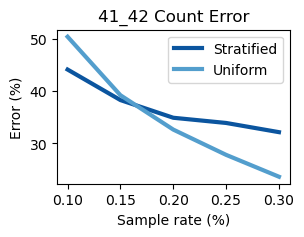

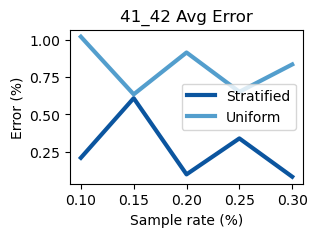

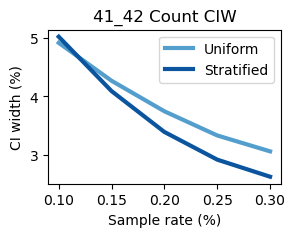

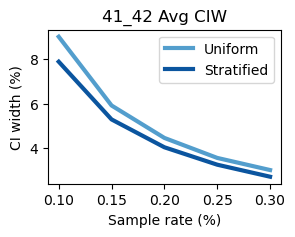

In [32]:
plot_error("41_42")

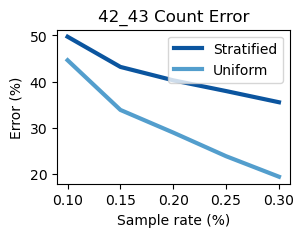

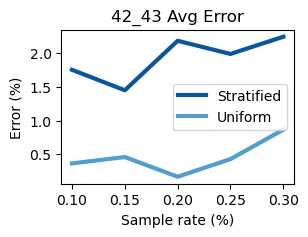

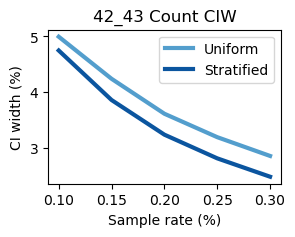

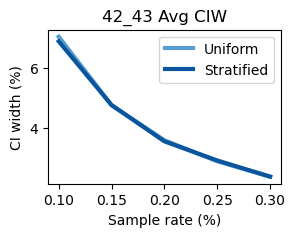

In [33]:
plot_error("42_43")

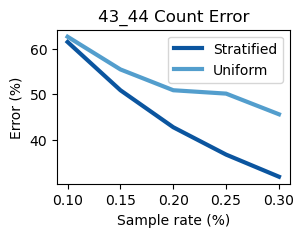

[1.8506700701978023, 8.269230769230756, 16.037735849056595, 26.823041327588957, 30.203305543366962]


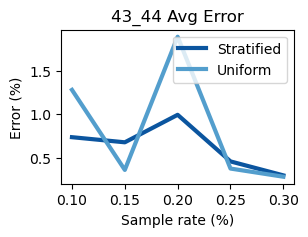

[42.42557599948804, -87.75286671715746, 47.41914062767001, -21.769178628427134, -5.523066420483809]


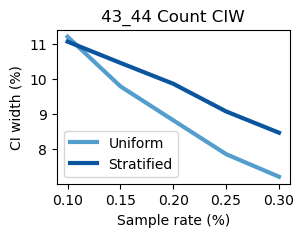

[1.2455357142857775, -6.829019073569407, -11.794217687074793, -15.48037268978156, -17.37714008456367]


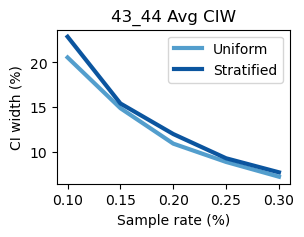

[-11.243983140744534, -3.5352394146404835, -9.753157324709528, -4.56615002002146, -6.744644812087944]


In [15]:
plot_error("43_44")

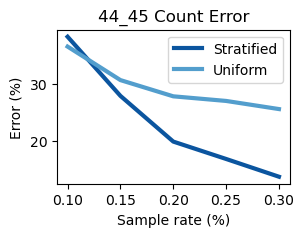

[-4.763851973011665, 9.089430894308887, 28.74630078019912, 37.97117516629712, 46.75058548009366]


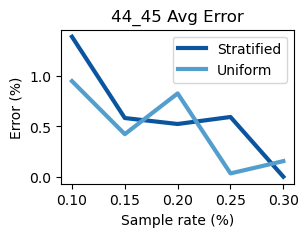

[-46.22376997110397, -37.469856016606286, 36.51444492765206, -1501.5923347154014, 97.2820737064043]


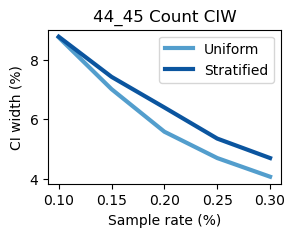

[-0.2544855755864918, -5.916917433806387, -14.64188576609248, -13.98952143632999, -15.496140955075232]


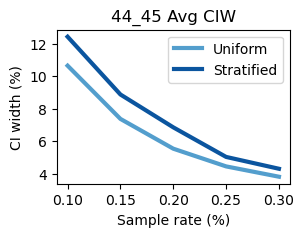

[-16.712620727551617, -20.337470306359684, -23.653662685847593, -13.057833131910256, -12.787049573319166]


In [16]:
plot_error("44_45")

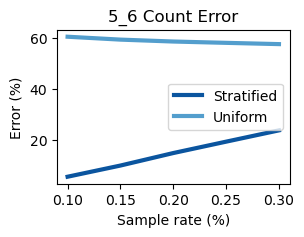

[91.17545435698985, 83.58432219591218, 74.97350399478233, 67.02447932089625, 59.01134953312386]


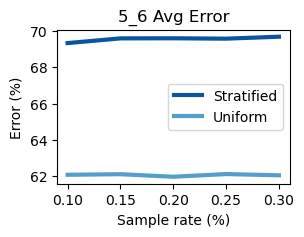

[-11.742171491958247, -12.104434232860878, -12.364585178107165, -12.065181179737975, -12.35959576929229]


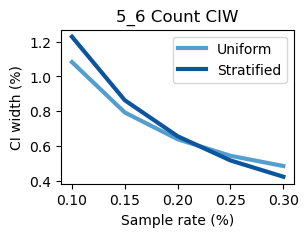

[-13.423522915516292, -8.828401475792575, -2.6572921039131265, 4.901284451890524, 12.593516209476299]


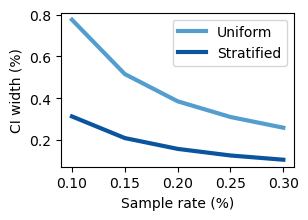

[59.63623222889023, 59.3548152311642, 59.04862440587392, 59.31500249423876, 59.08723119609672]


In [19]:
plot_error("5_6")

In [5]:
def plot_costs(avg_vehicle_partition: str, count_vehicle_partition: str, avg_human_partition: str, count_human_partition: str):
    avg_vehicle_file = f"../results/stratified_{avg_vehicle_partition}.jsonl"
    avg_vehicle_exhaustive_file = f"../results/exhaustive_{avg_vehicle_partition}.jsonl"
    count_vehicle_file = f"../results/stratified_{count_vehicle_partition}.jsonl"
    count_vehicle_exhaustive_file = f"../results/exhaustive_{count_vehicle_partition}.jsonl"
    avg_human_file = f"../results/stratified_{avg_human_partition}.jsonl"
    avg_human_exhaustive_file = f"../results/exhaustive_{avg_human_partition}.jsonl"
    count_human_file = f"../results/stratified_{count_human_partition}.jsonl"
    count_human_exhaustive_file = f"../results/exhaustive_{count_human_partition}.jsonl"
    _, _, avg_vehicle_results, _, avg_vehicle_costs = read_results(avg_vehicle_file)
    count_vehicle_results, _, _, _, count_vehicle_costs = read_results(count_vehicle_file)
    _, _, avg_human_results, _, avg_human_costs = read_results(avg_human_file)
    count_human_results, _, _, _, count_human_costs = read_results(count_human_file)
    _, _, avg_vehicle_exhaustive_results, _, avg_vehicle_exhaustive_costs = read_results(avg_vehicle_exhaustive_file)
    count_vehicle_exhaustive_results, _, _, _, count_vehicle_exhaustive_costs = read_results(count_vehicle_exhaustive_file)
    _, _, avg_human_exhaustive_results, _, avg_human_exhaustive_costs = read_results(avg_human_exhaustive_file)
    count_human_exhaustive_results, _, _, _, count_human_exhaustive_costs = read_results(count_human_exhaustive_file)


    vehicle_count_gt = count_vehicle_exhaustive_results[1]
    vehicle_count_exhaustive_cost = count_vehicle_exhaustive_costs[1]
    vehicle_avg_gt = avg_vehicle_exhaustive_results[1]
    vehicle_avg_exhaustive_cost = avg_vehicle_exhaustive_costs[1]
    human_count_gt = count_human_exhaustive_results[1]
    human_count_exhaustive_cost = count_human_exhaustive_costs[1]
    human_avg_gt = avg_human_exhaustive_results[1]
    human_avg_exhaustive_cost = avg_human_exhaustive_costs[1]

    count_vehicle_error = [100*abs(vehicle_count_gt - count_vehicle_results[rate])/vehicle_count_gt for rate in sorted(list(count_vehicle_results.keys()))]
    avg_vehicle_error = [100*abs(vehicle_avg_gt - avg_vehicle_results[rate])/vehicle_avg_gt for rate in sorted(list(avg_vehicle_results.keys()))]
    count_human_error = [100*abs(human_count_gt - count_human_results[rate])/human_count_gt for rate in sorted(list(count_human_results.keys()))]
    avg_human_error = [100*abs(human_avg_gt - avg_human_results[rate])/human_avg_gt for rate in sorted(list(avg_human_results.keys()))]

    count_vehicle_costs = [vehicle_count_exhaustive_cost/count_vehicle_costs[rate] for rate in sorted(list(count_vehicle_costs.keys()))]
    avg_vehicle_costs = [vehicle_avg_exhaustive_cost/avg_vehicle_costs[rate] for rate in sorted(list(avg_vehicle_costs.keys()))]
    count_human_costs = [human_count_exhaustive_cost/count_human_costs[rate] for rate in sorted(list(count_human_costs.keys()))]
    avg_human_costs = [human_avg_exhaustive_cost/avg_human_costs[rate] for rate in sorted(list(avg_human_costs.keys()))]

    # plot count error
    plt.figure(figsize=(3, 2))
    plt.plot(count_vehicle_costs, count_vehicle_error, label="Vehicle-COUNT", linewidth=3)
    plt.plot(avg_vehicle_costs, avg_vehicle_error, label="Vehicle-AVG", linewidth=3)
    plt.plot(count_human_costs, count_human_error, label="Human-COUNT", linewidth=3)
    plt.plot(avg_human_costs, avg_human_error, label="Human-AVG", linewidth=3)

    plt.xlabel("Cost reduction (X)")
    plt.ylabel("Error (%)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
    plt.savefig(f"figures/cost.pdf", bbox_inches='tight')
    plt.show()


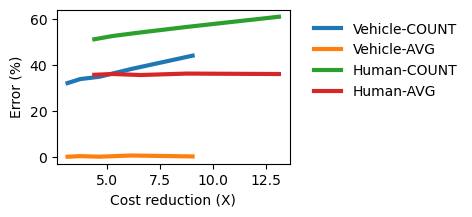

In [6]:
plot_costs("41_42", "41_42", "2_3", "2_3")

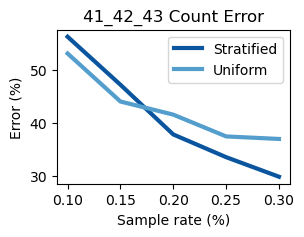

[-5.977130977130982, -7.199958200532957, 9.024835949829724, 10.490206927077569, 19.348611284095156]


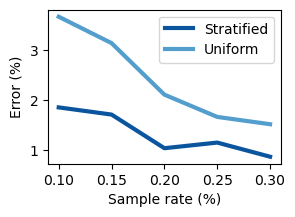

[49.33608350522402, 45.39439416188809, 50.59157325093277, 30.705730914893994, 42.59790084002363]


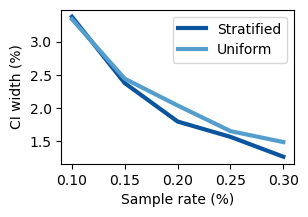

[1.1233367451381777, -2.8129702441628592, -13.487151080176345, -5.57718685013939, -17.52965328467151]


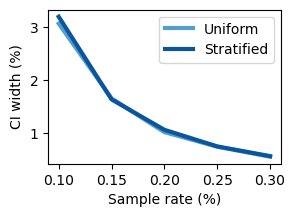

[-4.22136108824307, 1.2073936521178883, -4.352340943419217, -0.7827099244880922, -2.030937806100081]


In [11]:
plot_error("41_42_43")

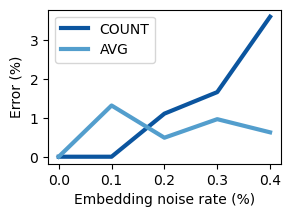

In [23]:
from collections import defaultdict

def plot_sensi(partition):
    sensi_file = f"../results/sensi_{partition}.jsonl"
    results = {}
    with open(sensi_file) as f:
        for line in f:
            data = json.loads(line)
            rate = data["rate"]
            count_results = data["count"]
            count_ciw = abs(data["count_ub"] - data["count_lb"])
            avg_results = data["avg"]
            avg_ciw = abs(data["avg_ub"] - data["avg_lb"])
            cost = data["cost"]
            prob = data["prob"]
            if rate not in results:
                results[rate] = {}
            results[rate][prob] = {
                "count": count_results,
                "avg": avg_results
            }
    for rate in results:
        for prob in results[rate]:
            results[rate][prob]["count_error"] = 100*abs(results[rate][prob]["count"] - results[rate][0]["count"])/results[rate][0]["count"]
            results[rate][prob]["avg_error"] = 100*abs(results[rate][prob]["avg"] - results[rate][0]["avg"])/results[rate][0]["avg"]

    probs = [0, 0.1, 0.2, 0.3, 0.4]
    rates = sorted(list(results.keys()))
    count_errors = [results[0.3][prob]["count_error"] for prob in probs]
    avg_errors = [results[0.3][prob]["avg_error"] for prob in probs]
    plt.figure(figsize=(3, 2))
    plt.plot(probs, count_errors, label=f"COUNT", color=colors["ours"], linewidth=3)
    plt.plot(probs, avg_errors, label=f"AVG", color=colors["baseline1"], linewidth=3)
    plt.xlabel("Embedding noise rate (%)")
    plt.ylabel("Error (%)")
    plt.legend()
    plt.savefig(f"figures/sensi_{partition}.pdf", bbox_inches='tight')
    plt.show()

plot_sensi("41_42")